In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ds10012","key":"432747ba73a35b98d9637ecf993a8628"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Feb 15 02:46 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
#Give permissions to change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
#get dataset locally
!kaggle competitions download -c data-storm-10

401 - Unauthorized


In [7]:
!mkdir train
!unzip credit_card_default_train.csv -d train

unzip:  cannot find or open credit_card_default_train.csv, credit_card_default_train.csv.zip or credit_card_default_train.csv.ZIP.


In [12]:
#let see our data
import pandas as pd

credit = pd.read_csv('/credit_card_default_train.csv')  
credit.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
Client_ID             24000 non-null object
Balance_Limit_V1      24000 non-null object
Gender                24000 non-null object
EDUCATION_STATUS      24000 non-null object
MARITAL_STATUS        24000 non-null object
AGE                   24000 non-null object
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          240

In [14]:
credit["Balance_Limit_V1"].describe()

count     24000
unique        8
top          1M
freq       5951
Name: Balance_Limit_V1, dtype: object

In [15]:
credit["NEXT_MONTH_DEFAULT"].describe()

count    24000.000000
mean         0.222083
std          0.415656
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: NEXT_MONTH_DEFAULT, dtype: float64

In [16]:
credit["MARITAL_STATUS"].describe()

count     24000
unique        2
top       Other
freq      13070
Name: MARITAL_STATUS, dtype: object

In [17]:
credit["EDUCATION_STATUS"].value_counts()

Other          11597
Graduate        8478
High School     3925
Name: EDUCATION_STATUS, dtype: int64

In [18]:
credit["AGE"].value_counts()

31-45           12124
Less than 30     7638
46-65            4150
More than 65       88
Name: AGE, dtype: int64

In [19]:
credit["MARITAL_STATUS"].value_counts()

Other     13070
Single    10930
Name: MARITAL_STATUS, dtype: int64

In [20]:
credit["Gender"].value_counts()

M    14460
F     9540
Name: Gender, dtype: int64

In [21]:
credit["NEXT_MONTH_DEFAULT"].value_counts()

0    18670
1     5330
Name: NEXT_MONTH_DEFAULT, dtype: int64

**Traiing set is not balnced**

In [22]:
credit.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

<h1>Pre Processsing<h1>

---




In [0]:
from sklearn import preprocessing

In [0]:
credit['limit'] = credit.Balance_Limit_V1.copy()

In [25]:
for i in range (len(credit['limit'])):
  if (credit['limit'][i][-1]=='M'):
    credit['limit'][i]=int(float(credit['Balance_Limit_V1'][i][:-1])*1000000)
  elif (credit['limit'][i][-1]=='K'):
    credit['limit'][i]=int(float(credit['limit'][i][:-1])*1000)
  else:
    credit['limit'][i]=int(credit['limit'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
credit["limit"].describe()


count       24000
unique          8
top       1000000
freq         5951
Name: limit, dtype: int64

In [0]:
credit=credit.drop('Balance_Limit_V1',axis=1)

In [0]:
col_list=['PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']

In [0]:
credit['paymentdue']=credit[col_list].sum(axis=1)

In [0]:
label_encoder = preprocessing.LabelEncoder()

In [0]:
credit["Gender"]=label_encoder.fit_transform(credit['Gender'])

In [0]:
credit["MARITAL_STATUS"]=label_encoder.fit_transform(credit['MARITAL_STATUS'])  

In [0]:
credit["EDUCATION_STATUS"]=label_encoder.fit_transform(credit['EDUCATION_STATUS'])

In [0]:
credit["AGE"]=label_encoder.fit_transform(credit['AGE'])

In [35]:
credit['AGE'].value_counts()

0    12124
2     7638
1     4150
3       88
Name: AGE, dtype: int64

In [36]:
#less than 30 avg 25
#31-45avg  38
#46-65 avg 55
#over 65 avg 65
for i in range (len(credit['AGE'])):
  if (credit['AGE'][i]==0):
    credit['AGE'][i]=38  
  elif (credit['AGE'][i]==1):
    credit['AGE'][i]=55   
  elif (credit['AGE'][i]==2):
    credit['AGE'][i]=25
  else: 
    credit['AGE'][i]=65 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/py

In [37]:
pd.set_option('display.max_rows', 30)
credit

,Client_ID,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,limit,paymentdue
0,A2,1,0,0,38,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0,1000000,-6
1,A3,0,1,0,25,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0,1000000,-4
2,A4,0,1,1,38,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1,100000,7
3,A5,0,0,1,38,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1,200000,2
4,A6,0,0,0,38,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0,1000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,A29996,0,1,1,38,0,0,0,0,0,0,436470,445403,481323,203289,72157,36914,19635,46200,11557,7039,11550,2310,0,1000000,0
23996,A29997,0,1,0,38,-1,-1,-1,-1,0,0,3888,4223,8090,20741,11989,0,4243,8145,20785,298,0,0,0,400000,-4
23997,A29998,0,2,0,38,4,3,2,-1,0,0,8235,7752,6371,48228,47544,44715,0,0,50820,9702,4620,7161,1,100000,8
23998,A29999,0,1,1,38,1,-1,0,0,0,-1,-3800,181055,176262,121908,27385,113061,198429,7875,2721,4449,122347,4167,1,200000,-1


In [0]:
# %matplotlib inline
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import numpy as np

<h3>Correlation Analysis

In [0]:
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1)
sns.heatmap(credit.corr(), annot = True ,linewidths=.1)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(credit.drop(columns=['NEXT_MONTH_DEFAULT']) , 0.9)

In [0]:
columns_to_drop 

['DUE_AMT_JULY', 'DUE_AMT_SEP', 'DUE_AMT_NOV']

In [0]:
df = credit.drop(columns=columns_to_drop)
df.shape

(24000, 22)

In [0]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 22 columns):
Client_ID             24000 non-null object
Gender                24000 non-null int64
EDUCATION_STATUS      24000 non-null int64
MARITAL_STATUS        24000 non-null int64
AGE                   24000 non-null int64
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          24000 non-null int64
PAID_AMT_OCT          24000 non-null int64
PAID_AMT_NOV          24000 non-null int64
PAID_AMT_DEC          24000 non-null int64
NEXT_MONTH_DEFAULT    24000 no

In [0]:
corr = credit.corr()
linear_features=abs(corr).NEXT_MONTH_DEFAULT.drop('NEXT_MONTH_DEFAULT').sort_values(ascending=False).keys()

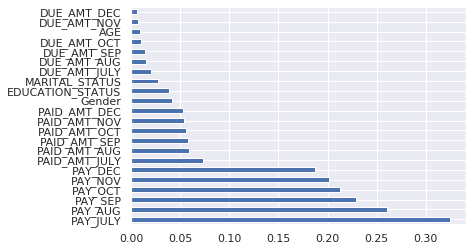

In [0]:
abs(corr).NEXT_MONTH_DEFAULT.drop('NEXT_MONTH_DEFAULT').sort_values(ascending=False).plot(kind='barh')

<h3>Using Random Forest Classifier to Identify Important Features

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = credit.copy(deep=True)['NEXT_MONTH_DEFAULT']
model = rf.fit(credit.drop(['NEXT_MONTH_DEFAULT','Client_ID'], axis=1),y)

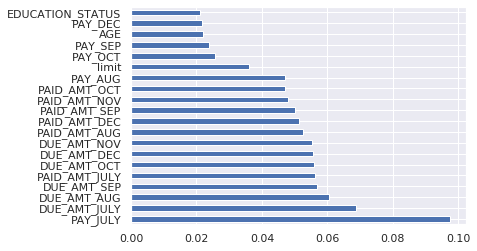

In [0]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=credit.drop(['NEXT_MONTH_DEFAULT','Client_ID'], axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

<H1>My model

In [0]:
credit1=credit[['NEXT_MONTH_DEFAULT','limit','AGE','EDUCATION_STATUS','MARITAL_STATUS','paymentdue','Gender']]

In [40]:
credit1

,NEXT_MONTH_DEFAULT,limit,AGE,EDUCATION_STATUS,MARITAL_STATUS,paymentdue,Gender
0,0,1000000,38,0,0,-6,1
1,0,1000000,25,1,0,-4,0
2,1,100000,38,1,1,7,0
3,1,200000,38,0,1,2,0
4,0,1000000,38,0,0,4,0
...,...,...,...,...,...,...,...
23995,0,1000000,38,1,1,0,0
23996,0,400000,38,1,0,-4,0
23997,1,100000,38,2,0,8,0
23998,1,200000,38,1,1,-1,0


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(credit1.drop('NEXT_MONTH_DEFAULT',1), credit1['NEXT_MONTH_DEFAULT'], test_size = .2, random_state=10)

In [58]:
x_train

,limit,AGE,EDUCATION_STATUS,MARITAL_STATUS,paymentdue,Gender
10140,400000,55,2,1,4,0
22535,1000000,38,0,1,-5,1
1962,200000,25,0,0,2,1
22322,500000,25,1,1,0,1
18038,300000,38,0,1,-12,1
...,...,...,...,...,...,...
9372,1500000,55,0,1,-1,1
7291,200000,25,1,0,6,1
17728,500000,38,2,0,-1,1
7293,200000,25,0,0,0,0


<h1>Applying ML Models 


<h2>Random Forest Classifier

In [60]:
test = pd.read_csv('/credit_card_default_test.csv')
test.head()


,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,A20170,500K,M,Other,Single,31-45,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
1,A16887,200K,F,Other,Single,31-45,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
2,A3430,400K,M,Other,Other,Less than 30,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060
3,A3696,1.5M,M,Graduate,Single,31-45,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0
4,A20474,100K,F,High School,Other,Less than 30,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test.isnull().sum()
test=test.dropna()
test=test.drop(['Client_ID'],axis=1)

In [0]:
test['limit'] = test.Balance_Limit_V1.copy()

In [63]:
for i in range (len(test['limit'])):
  if (test['limit'][i][-1]=='M'):
    test['limit'][i]=int(float(test['Balance_Limit_V1'][i][:-1])*1000000)
  elif (test['limit'][i][-1]=='K'):
    test['limit'][i]=int(float(test['limit'][i][:-1])*1000)
  else:
    test['limit'][i]=int(test['limit'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
test['paymentdue']=test[col_list].sum(axis=1)

In [0]:
test["Gender"]=label_encoder.fit_transform(test['Gender'])

In [0]:
test["MARITAL_STATUS"]=label_encoder.fit_transform(test['MARITAL_STATUS']) 

In [0]:
test["EDUCATION_STATUS"]=label_encoder.fit_transform(test['EDUCATION_STATUS'])

In [0]:
test["AGE"]=label_encoder.fit_transform(test['AGE'])

In [0]:
test["Gender"]=label_encoder.fit_transform(test['Gender'])


In [0]:
test=test[['limit','AGE','EDUCATION_STATUS','MARITAL_STATUS','Gender','paymentdue']]

In [71]:
test

,limit,AGE,EDUCATION_STATUS,MARITAL_STATUS,Gender,paymentdue
0,500000,0,2,1,1,0
1,200000,0,2,1,0,0
2,400000,2,2,0,1,-1
3,1500000,0,0,1,1,-7
4,100000,2,1,0,0,-8
...,...,...,...,...,...,...
5995,1000000,0,1,0,1,0
5996,1500000,0,0,1,0,-7
5997,300000,0,2,1,1,0
5998,200000,1,1,1,1,0


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300,max_depth=10)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
# cla_pred.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))

0.805625


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [0]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]

In [76]:
for name,model in classifiers:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.7770833333333333
Decision Tree Classification : 0.7852083333333333
Gradient Boosting Classification : 0.8095833333333333
Ada Boosting Classification : 0.8064583333333334
Extra Tree Classification : 0.7885416666666667
K-Neighbors Classification : 0.7754166666666666
Support Vector Classification : 0.7770833333333333
Gaussian Naive Bayes : 0.7775


In [79]:
test.shape

(6000, 6)

In [82]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
predictions = model.predict(test)

# pred1=model.predict(pred)
#np.savetxt('out2.csv',predictions,delimiter=',')
# cla_pred.append(accuracy_score(y_test,predictions))
print('AdaBoostClassifier:',accuracy_score(y_test,prediction))


AdaBoostClassifier: 0.8064583333333334


<h3>GradientBoostingClassifier <h3>

In [84]:
model = GradientBoostingClassifier(n_estimators=500)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
# pred1=model.predict(pred)
# np.savetxt('submission.csv',predictions,delimiter=',')
# cla_pred.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))

0.8083333333333333
